# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") # lol booth extra bonus line

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yarmouth
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | oistins
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | taiohae
Processing Record 9 of Set 1 | babayurt
Processing Record 10 of Set 1 | betio village
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | basco
Processing Record 13 of Set 1 | sitangkai
Processing Record 14 of Set 1 | bytow
Processing Record 15 of Set 1 | horta
Processing Record 16 of Set 1 | chibougamau
Processing Record 17 of Set 1 | hurricane
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | perevolotskiy
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | grytviken
Processing Re

Processing Record 46 of Set 4 | levski
Processing Record 47 of Set 4 | margate
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | seogwipo
Processing Record 0 of Set 5 | palikir - national government center
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | ishigaki
Processing Record 3 of Set 5 | tsiombe
Processing Record 4 of Set 5 | plock
Processing Record 5 of Set 5 | beira
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | zhangye
Processing Record 8 of Set 5 | aykol
Processing Record 9 of Set 5 | colonia
Processing Record 10 of Set 5 | mana
Processing Record 11 of Set 5 | gadani
Processing Record 12 of Set 5 | mournies
Processing Record 13 of Set 5 | nishinoomote
Processing Record 14 of Set 5 | howrah
Processing Record 15 of Set 5 | mukhorshibir'
Processing Record 16 of Set 5 | gillette
Processing Record 17 of Set 5 | badr hunayn
Processing Record 18 of Set 5 | karratha
Processing Record 19 of Set 5 | geraldton
Pr

Processing Record 44 of Set 8 | yungay
Processing Record 45 of Set 8 | isla mujeres
Processing Record 46 of Set 8 | calca
Processing Record 47 of Set 8 | poa
Processing Record 48 of Set 8 | tralee
Processing Record 49 of Set 8 | crane
Processing Record 0 of Set 9 | chonchi
Processing Record 1 of Set 9 | bima
Processing Record 2 of Set 9 | sorong
Processing Record 3 of Set 9 | peterhead
Processing Record 4 of Set 9 | ahau
Processing Record 5 of Set 9 | daru
Processing Record 6 of Set 9 | martuk
Processing Record 7 of Set 9 | mariehamn
Processing Record 8 of Set 9 | sandnessjoen
Processing Record 9 of Set 9 | kone
Processing Record 10 of Set 9 | vorgashor
Processing Record 11 of Set 9 | plastun
Processing Record 12 of Set 9 | lodwar
Processing Record 13 of Set 9 | constantia
Processing Record 14 of Set 9 | felipe carrillo puerto
Processing Record 15 of Set 9 | zhangjiakou shi xuanhua qu
Processing Record 16 of Set 9 | kilkeel
Processing Record 17 of Set 9 | puerto gaitan
Processing Recor

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           553
Lng           553
Max Temp      553
Humidity      553
Pressure      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,yarmouth,41.7057,-70.2286,73.09,81.0,1022.0,20.0,12.66,US,1.718666e+09
1,stanley,54.8680,-1.6985,51.71,92.0,1012.0,20.0,6.91,GB,1.718666e+09
2,oistins,13.0667,-59.5333,82.49,89.0,1011.0,40.0,13.80,BB,1.718666e+09
3,blackmans bay,-43.0167,147.3167,43.74,94.0,1018.0,100.0,1.01,AU,1.718666e+09
4,invercargill,-46.4000,168.3500,47.01,90.0,1024.0,47.0,10.00,NZ,1.718666e+09


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,yarmouth,41.7057,-70.2286,73.09,81.0,1022.0,20.0,12.66,US,1.718666e+09
1,stanley,54.8680,-1.6985,51.71,92.0,1012.0,20.0,6.91,GB,1.718666e+09
2,oistins,13.0667,-59.5333,82.49,89.0,1011.0,40.0,13.80,BB,1.718666e+09
3,blackmans bay,-43.0167,147.3167,43.74,94.0,1018.0,100.0,1.01,AU,1.718666e+09
4,invercargill,-46.4000,168.3500,47.01,90.0,1024.0,47.0,10.00,NZ,1.718666e+09


In [8]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 0 to 595
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        596 non-null    object 
 1   Lat         573 non-null    float64
 2   Lng         573 non-null    float64
 3   Max Temp    573 non-null    float64
 4   Humidity    573 non-null    float64
 5   Pressure    573 non-null    float64
 6   Cloudiness  573 non-null    float64
 7   Wind Speed  573 non-null    float64
 8   Country     570 non-null    object 
 9   Date        573 non-null    float64
dtypes: float64(8), object(2)
memory usage: 51.2+ KB


In [22]:
city_data_df.loc[pd.isnull(city_data_df['Lat'])]


,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
7,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,cable beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,hayma',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,muzayri',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,seogwipo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,aykol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,mukhorshibir',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,tobi village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df=city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     550 non-null    int64  
 1   City        550 non-null    object 
 2   Lat         550 non-null    float64
 3   Lng         550 non-null    float64
 4   Max Temp    550 non-null    float64
 5   Humidity    550 non-null    float64
 6   Pressure    550 non-null    float64
 7   Cloudiness  550 non-null    float64
 8   Wind Speed  550 non-null    float64
 9   Country     550 non-null    object 
 10  Date        550 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 47.4+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

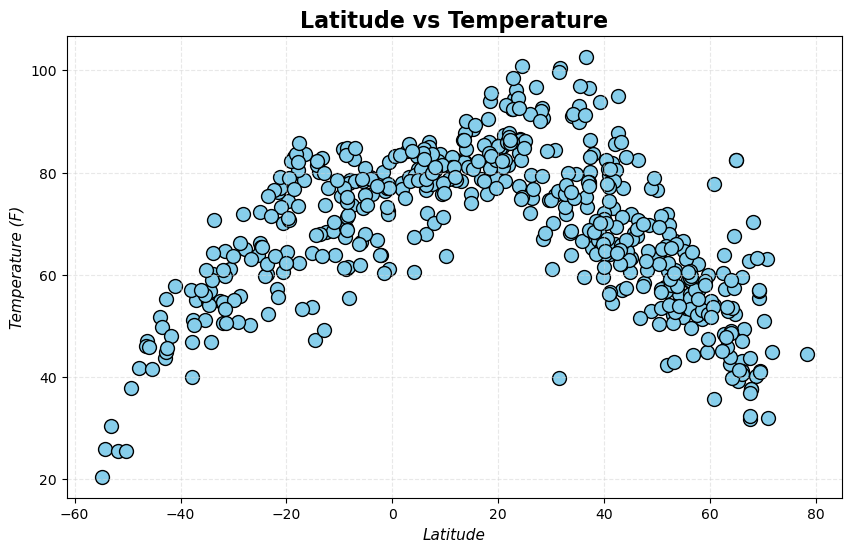

In [33]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = df.Lat
y = df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="skyblue", edgecolor="black",linewidths=1, s=100,marker="o",alpha=1)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=11, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=11, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

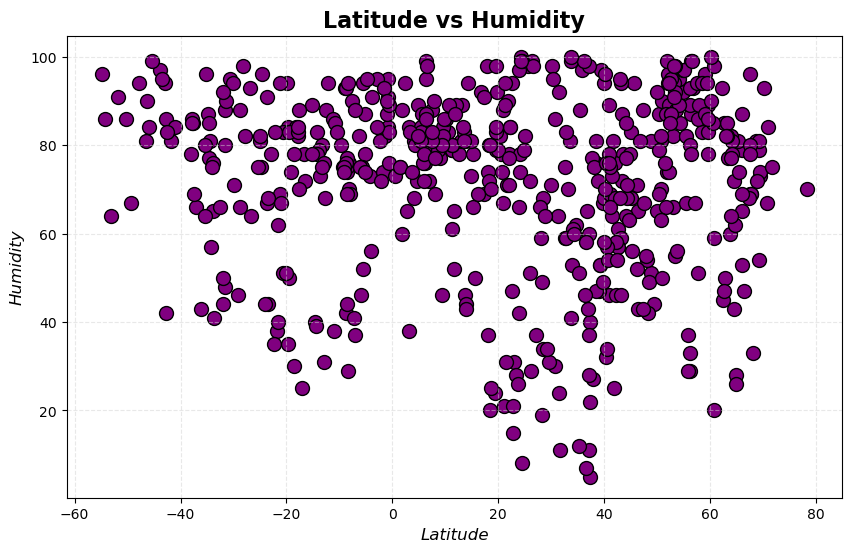

In [35]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = df.Lat
y = df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

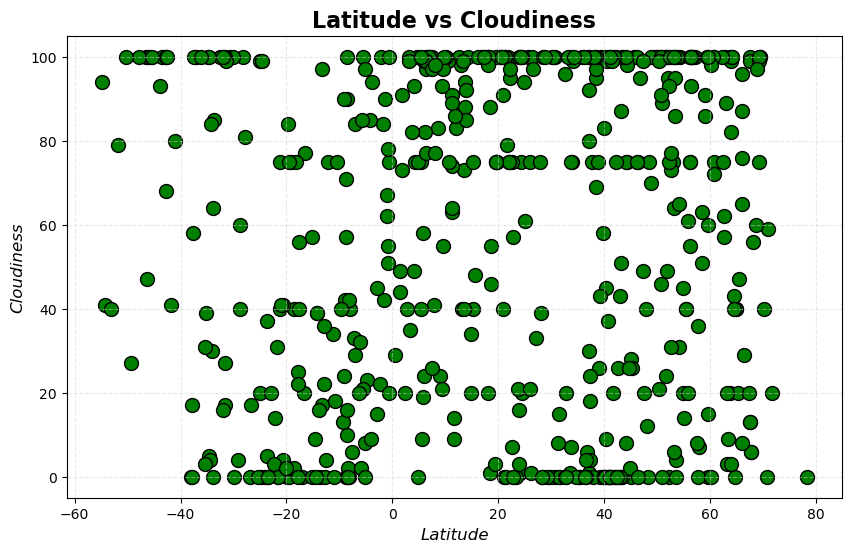

In [37]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = df.Lat
y = df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="green", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

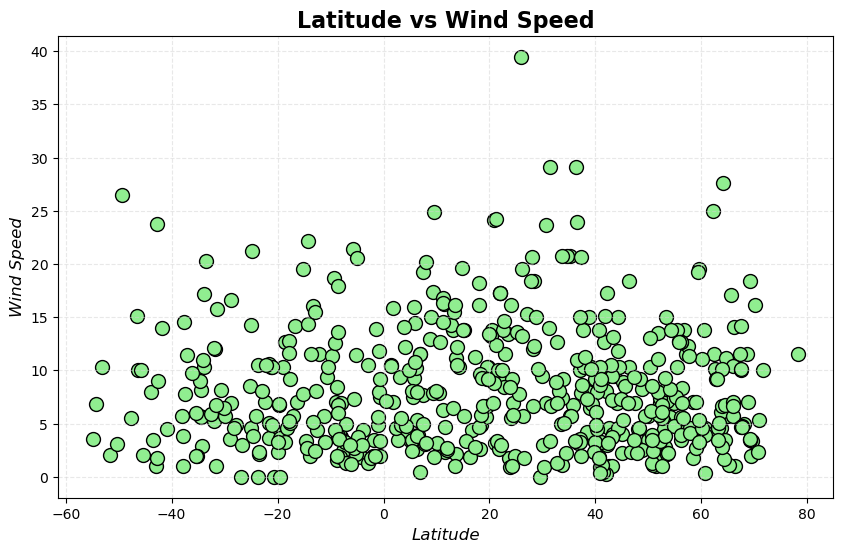

In [41]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = df.Lat
y = df["Wind Speed"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="lightgreen", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,yarmouth,41.7057,-70.2286,73.09,81.0,1022.0,20.0,12.66,US,1.718666e+09
1,1,stanley,54.8680,-1.6985,51.71,92.0,1012.0,20.0,6.91,GB,1.718666e+09
2,2,oistins,13.0667,-59.5333,82.49,89.0,1011.0,40.0,13.80,BB,1.718666e+09
7,8,babayurt,43.6002,46.7789,76.96,78.0,1012.0,100.0,9.44,RU,1.718666e+09
8,9,betio village,1.3580,172.9211,83.48,75.0,1010.0,44.0,10.47,KI,1.718666e+09


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
3,3,blackmans bay,-43.0167,147.3167,43.74,94.0,1018.0,100.0,1.01,AU,1.718666e+09
4,4,invercargill,-46.4000,168.3500,47.01,90.0,1024.0,47.0,10.00,NZ,1.718666e+09
5,5,adamstown,-25.0660,-130.1015,72.28,81.0,1014.0,99.0,14.29,PN,1.718666e+09
6,6,waitangi,-43.9535,-176.5597,51.82,97.0,1013.0,93.0,8.01,NZ,1.718666e+09
19,20,port-aux-francais,-49.3500,70.2167,37.87,67.0,1000.0,27.0,26.46,TF,1.718666e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5491491490191415


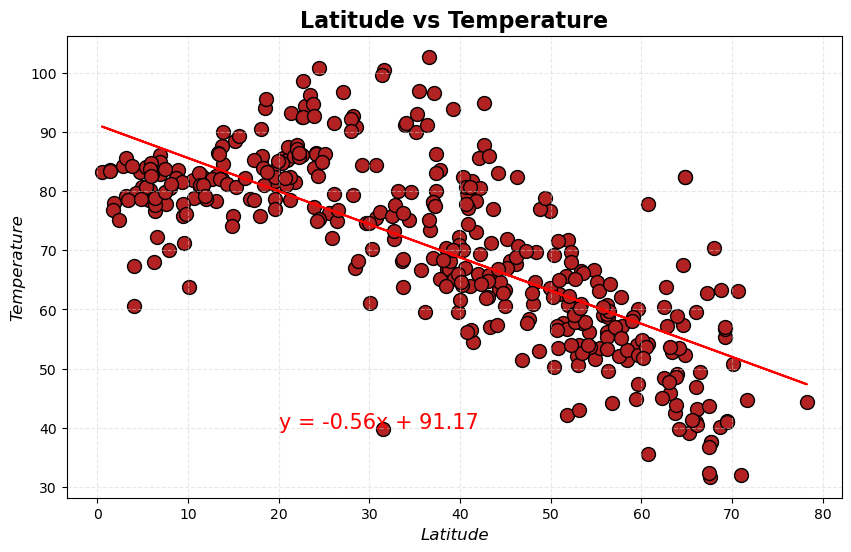

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.5853230125865481


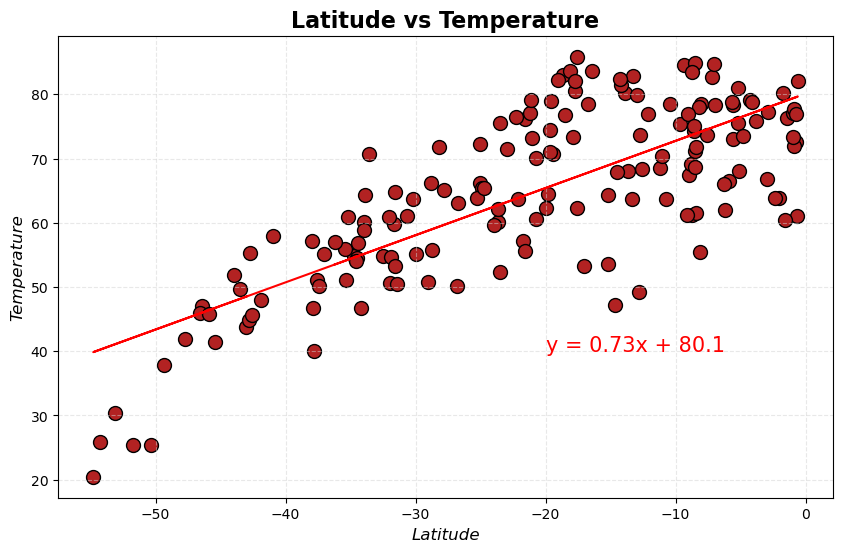

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 2.0969271106413003e-05


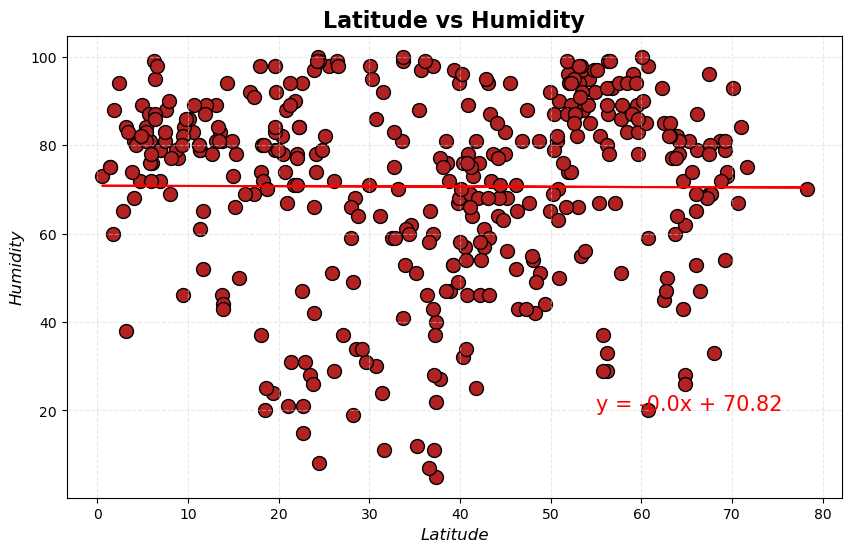

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (55,20))

The r-squared is: 0.005681305050490333


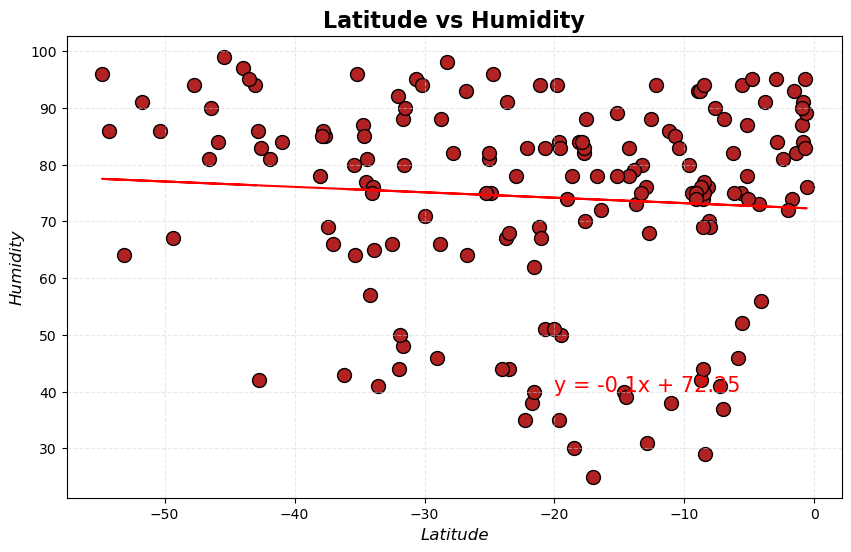

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-20,40))

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008491533080021412


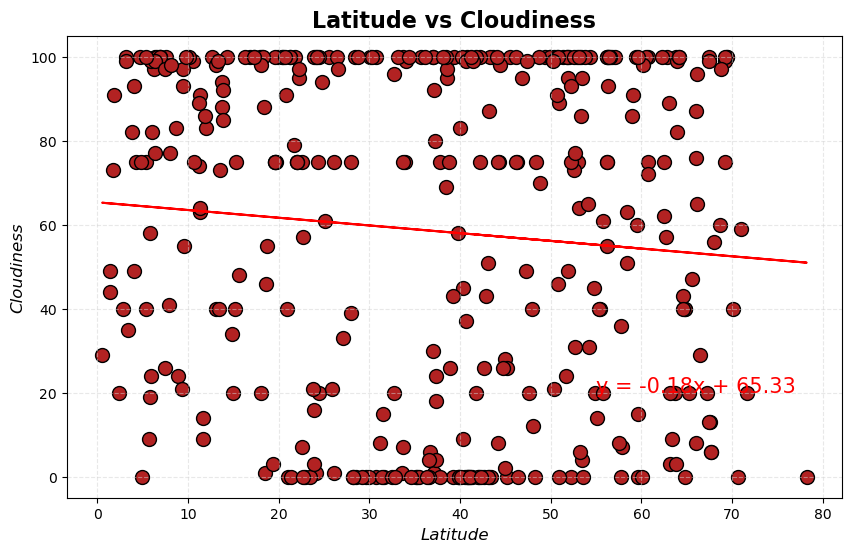

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (55,20))

The r-squared is: 0.053307098138491465


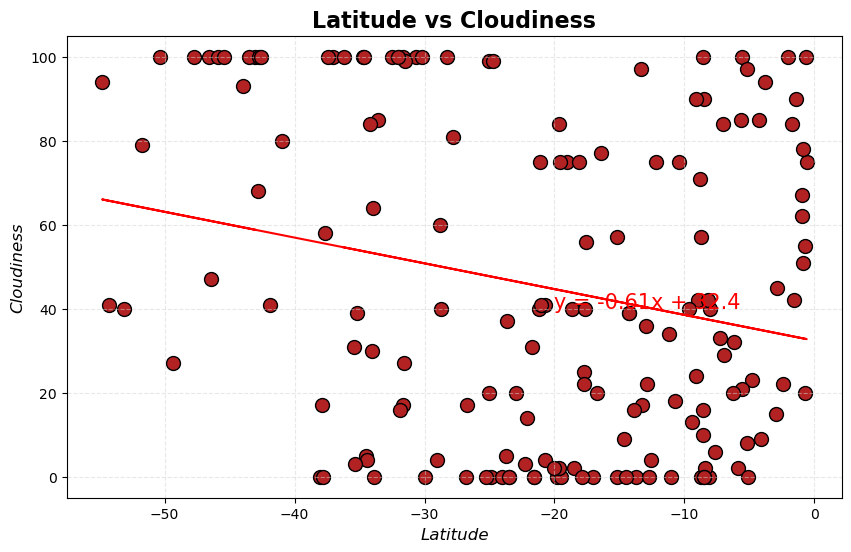

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-20,40))

**Discussion about the linear relationship:** The low r values indicate that there is no  relationship between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01732210733548569


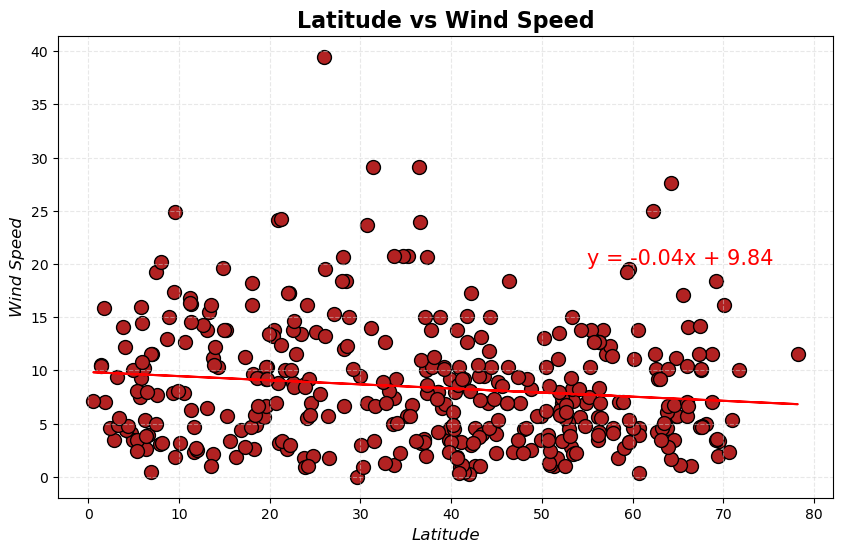

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (55,20))

The r-squared is: 0.010096322530859543


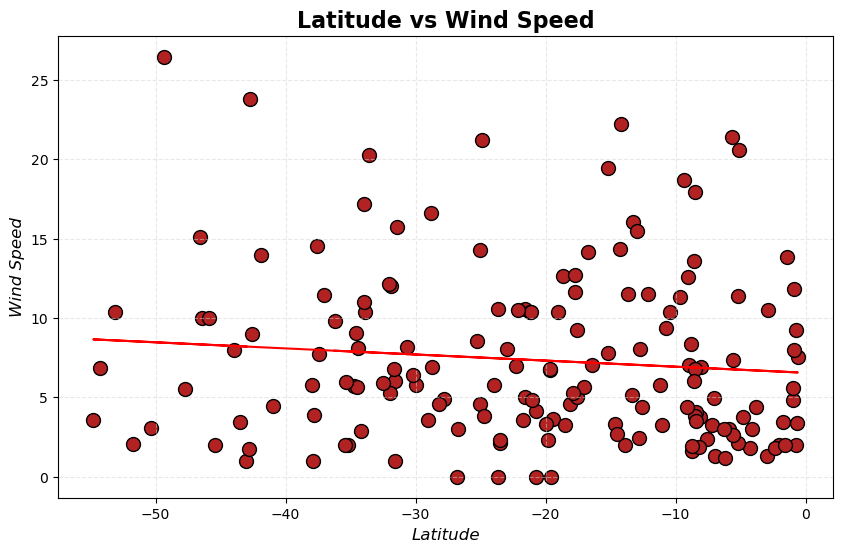

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,40))

**Discussion about the linear relationship:** The low r values indicate that there is no  relationship between wind speed and latitude.